In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt

# Чтение набора данных об уровене денежных доходов населения в целом по россии и по субъектам российской федерации
## Ссылка на данные: https://rosstat.gov.ru/storage/mediabank/1-1-1_nov_met_izm.xlsx

In [4]:
df = pd.read_excel('data.xlsx')
df.head()

,Название субъекта,"Денежные доходы в расчете на душу населения, рублей в месяц 2013г.","Денежные доходы в расчете на душу населения, рублей в месяц 2014г.","Денежные доходы в расчете на душу населения, рублей в месяц 2015г.","Денежные доходы в расчете на душу населения, рублей в месяц 2016г.","Денежные доходы в расчете на душу населения, рублей в месяц 2017г.","Денежные доходы в расчете на душу населения, рублей в месяц 2018г.","Денежные доходы в расчете на душу населения, рублей в месяц 2019г.","Денежные доходы в расчете на душу населения, рублей в месяц 2020г.","Денежные доходы в расчете на душу населения, рублей в месяц 2021г."
0,Белгородская область,23246.766439,24750.163161,28043.238208,29798.581019,30342.115565,30778.0,32398.0,32884.0,35612.0
1,Брянская область,18707.421437,20594.446675,23428.121119,24005.628433,25106.605890,26658.0,28422.0,28636.0,31608.0
2,Владимирская область,18057.844532,19529.482244,22712.329960,22365.292780,23553.978729,23560.0,25391.0,25955.0,28523.0
3,Воронежская область,21682.906642,24973.337981,29365.774533,29283.948998,29497.731862,30289.0,32022.0,32102.0,35198.0
4,Ивановская область,17754.109842,19831.944017,22296.566313,23675.818198,24859.531479,24503.0,25794.0,26284.0,28680.0


In [5]:
df = df.rename(columns={'Название субъекта': 'subject_name', 'Денежные доходы в расчете на душу населения, рублей в месяц 2013г.': 'per_capita_income'})

In [6]:
income_df = df[['subject_name', 'per_capita_income']]
income_df.head()

,subject_name,per_capita_income
0,Белгородская область,23246.766439
1,Брянская область,18707.421437
2,Владимирская область,18057.844532
3,Воронежская область,21682.906642
4,Ивановская область,17754.109842


In [7]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subject_name       89 non-null     object 
 1   per_capita_income  85 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [8]:
income_df = income_df.dropna()
income_df['per_capita_income'] = income_df['per_capita_income'].astype(int)

# Посмотрим на график распределения

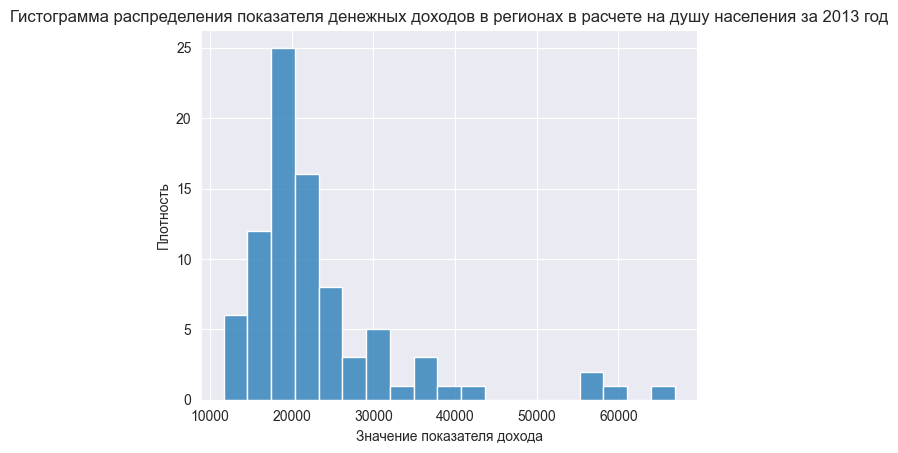

In [9]:
sns.histplot(income_df['per_capita_income'])

plt.title('Гистограмма распределения показателя денежных доходов в регионах в расчете на душу населения за 2013 год')
plt.xlabel('Значение показателя дохода')
plt.ylabel('Плотность')
plt.show()

# Рассчёт статистик

In [15]:
mean = round(income_df['per_capita_income'].mean(),2)
variance = round(income_df['per_capita_income'].var(ddof=0),2)
skewness = round(income_df['per_capita_income'].skew(),2)
kurtosis = round(income_df['per_capita_income'].kurtosis(),2)
first_moment = round(income_df['per_capita_income'].mean(),2)
second_moment = round((income_df['per_capita_income'] ** 2).mean(),2)
third_moment = round(((income_df['per_capita_income'] - first_moment) ** 3).mean(),2)
fourth_moment = round(((income_df['per_capita_income'] - first_moment) ** 4).mean(),2)
quantiles_0_05 = round(income_df['per_capita_income'].quantile(0.05),2)
quantiles_0_95 = round(income_df['per_capita_income'].quantile(0.95),2)
percentile_2_5 = round(income_df['per_capita_income'].quantile(0.025),2)

In [25]:
print("Мат. ожидание:", mean)
print("Дисперсия:", variance)
print("Среднеквадратичное отклонение: ", round(sqrt(variance),2))
print("Асимметрия:", skewness)
print("Эксцесс:", kurtosis)
print("Первый момент (среднее):", first_moment)
print("Второй момент:", second_moment)
print("Третий момент:", third_moment)
print("Четвертый момент:", fourth_moment)
print("Квантиль 0.05%:", quantiles_0_05)
print("Квантиль 0.95%", quantiles_0_95)
print("2.5%-ная точка:", percentile_2_5)

Мат. ожидание: 23401.62
Дисперсия: 101030008.07
Среднеквадратичное отклонение:  10051.37
Асимметрия: 2.39
Эксцесс: 6.39
Первый момент (среднее): 23401.62
Второй момент: 446549883.84
Третий момент: 2382239549291.56
Четвертый момент: 9.14049196034336e+16
Квантиль 0.05%: 14285.8
Квантиль 0.95% 41758.8
2.5%-ная точка: 13605.0


## Выводы
Асимметрия > 0, распределение смещено влево
Эксцесс > 0, распределение выпукло

# Построим сравнительную диаграмму найденного распределения и распределения по нормальному закону

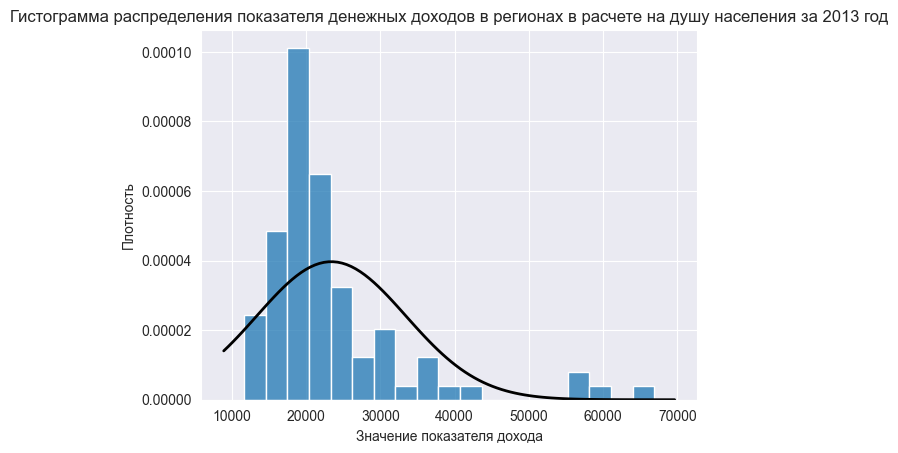

In [23]:
sns.histplot(income_df['per_capita_income'], kde=False, stat="density")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, sqrt(variance))

plt.plot(x, p, "k", linewidth=2, label="Нормальное распределение")
plt.title('Гистограмма распределения показателя денежных доходов в регионах в расчете на душу населения за 2013 год')
plt.xlabel('Значение показателя дохода')
plt.ylabel('Плотность')
plt.show()